In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import *
from sklearn.metrics import *
import seaborn as sns

In [2]:
test_data = pd.read_csv("test_dataset.csv")
train_data = pd.read_csv("train_dataset.csv")

# Exploring Data

In [3]:
train_data.shape

(48120, 4)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
train_data.head().append(train_data.tail())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16360\3258424950.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data.head().append(train_data.tail())


,DateTime,Junction,Vehicles,ID
0,01-11-2015 00:00,1,15,20151101001
1,01-11-2015 01:00,1,13,20151101011
2,01-11-2015 02:00,1,10,20151101021
3,01-11-2015 03:00,1,7,20151101031
4,01-11-2015 04:00,1,9,20151101041
48115,30-06-2017 19:00,4,11,20170630194
48116,30-06-2017 20:00,4,30,20170630204
48117,30-06-2017 21:00,4,16,20170630214
48118,30-06-2017 22:00,4,22,20170630224
48119,30-06-2017 23:00,4,12,20170630234


In [6]:
test_data.shape

(11808, 3)

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  11808 non-null  object
 1   Junction  11808 non-null  int64 
 2   ID        11808 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 276.9+ KB


In [8]:
test_data.head().append(test_data.tail())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16360\702761536.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_data.head().append(test_data.tail())


,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041
11803,2017-10-31 19:00:00,4,20171031194
11804,2017-10-31 20:00:00,4,20171031204
11805,2017-10-31 21:00:00,4,20171031214
11806,2017-10-31 22:00:00,4,20171031224
11807,2017-10-31 23:00:00,4,20171031234


In [9]:
train_data.duplicated().sum()

0

In [10]:
test_data.duplicated().sum()

0

In [11]:
a = train_data.isnull().sum()
b = test_data.isnull().sum()
print(a,b)

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64 DateTime    0
Junction    0
ID          0
dtype: int64


In [12]:
# Converting datetime column to datetime type
train_data['DateTime'] = pd.to_datetime(train_data['DateTime'])
test_data['DateTime'] = pd.to_datetime(test_data['DateTime'])

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


# Data Visualization

Text(0.5, 0, 'DateTime')

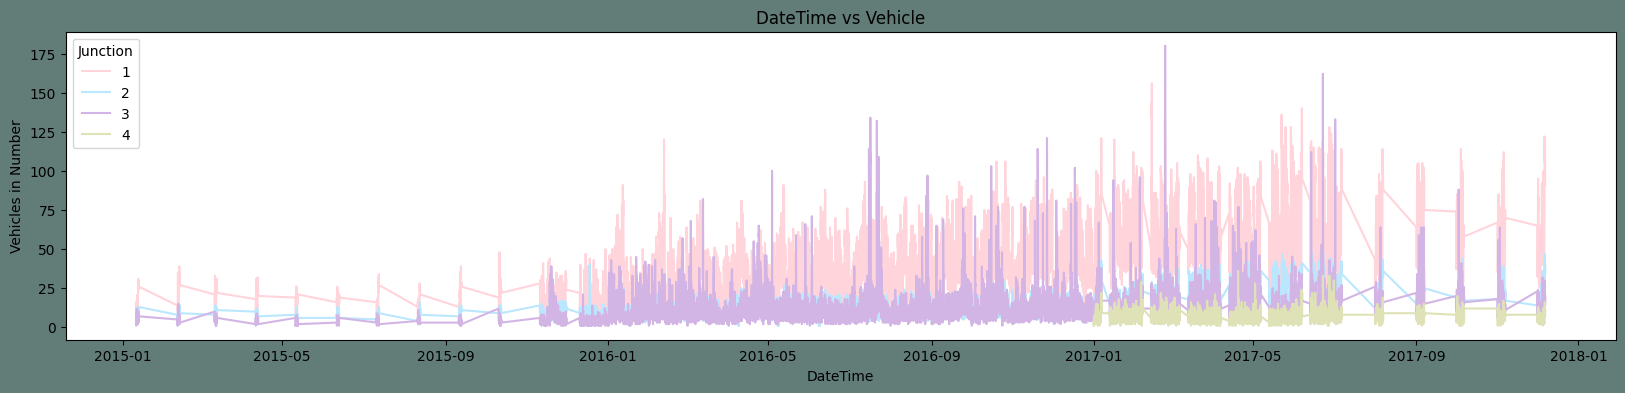

In [14]:
#Datetime vs vehicle at junction
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]
plt.figure(figsize=(20,4),facecolor="#627D78")  
time_series=sns.lineplot(x=train_data['DateTime'],y="Vehicles",data=train_data, hue="Junction", palette=colors)  
time_series.set_title("DateTime vs Vehicle")  
time_series.set_ylabel("Vehicles in Number")  
time_series.set_xlabel("DateTime")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16360\2784887437.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train_data.corr()


<Axes: >

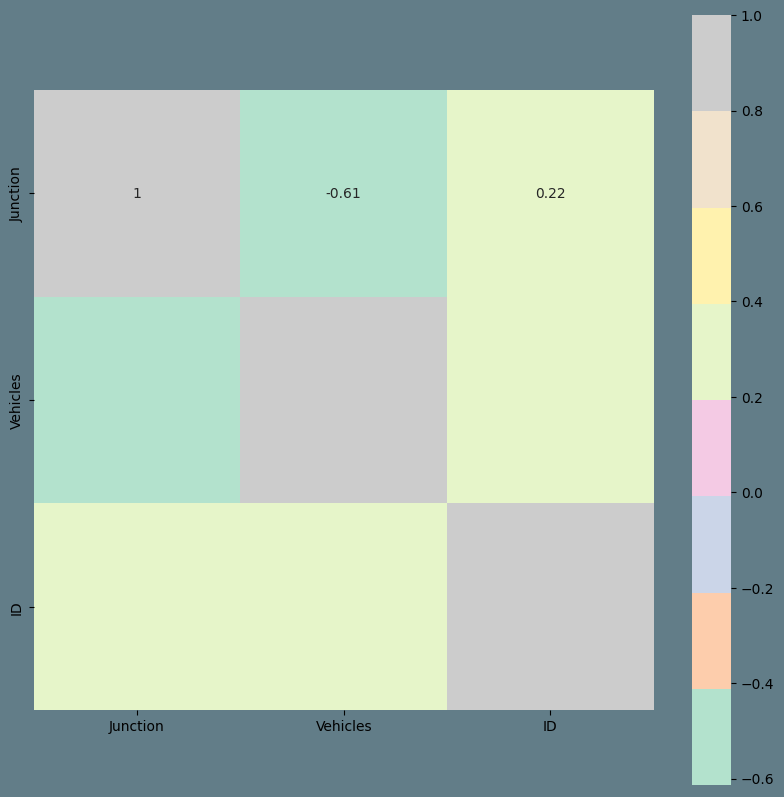

In [15]:
#heat map

corrmat = train_data.corr()
plt.subplots(figsize=(10,10),facecolor="#627D88")
sns.heatmap(corrmat,cmap="Pastel2",annot=True,square=True)

# Extracting features

In [16]:
# Extract features from datetime column
train_data['year'] = train_data['DateTime'].dt.year
train_data['month'] = train_data['DateTime'].dt.month
train_data['day'] = train_data['DateTime'].dt.day
train_data['hour'] = train_data['DateTime'].dt.hour


test_data['year'] = test_data['DateTime'].dt.year
test_data['month'] = test_data['DateTime'].dt.month
test_data['day'] = test_data['DateTime'].dt.day
test_data['hour'] = test_data['DateTime'].dt.hour



In [17]:
train_data['day_of_week'] = train_data['DateTime'].dt.day_name()
test_data['day_of_week'] = test_data['DateTime'].dt.day_name()

In [18]:
# Convert 'day_of_week' into one-hot encoded format
train_data = pd.get_dummies(train_data, columns=['day_of_week'])
test_data = pd.get_dummies(test_data, columns=['day_of_week'])


In [19]:
#train_data.drop(columns=['DateTime'], inplace=True)
#test_data.drop(columns=['DateTime'], inplace=True)

In [20]:
train_data.head()

,DateTime,Junction,Vehicles,ID,year,month,day,hour,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,2015-01-11 00:00:00,1,15,20151101001,2015,1,11,0,0,0,0,1,0,0,0
1,2015-01-11 01:00:00,1,13,20151101011,2015,1,11,1,0,0,0,1,0,0,0
2,2015-01-11 02:00:00,1,10,20151101021,2015,1,11,2,0,0,0,1,0,0,0
3,2015-01-11 03:00:00,1,7,20151101031,2015,1,11,3,0,0,0,1,0,0,0
4,2015-01-11 04:00:00,1,9,20151101041,2015,1,11,4,0,0,0,1,0,0,0


In [21]:
test_data.head()

,DateTime,Junction,ID,year,month,day,hour,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,2017-07-01 00:00:00,1,20170701001,2017,7,1,0,0,0,1,0,0,0,0
1,2017-07-01 01:00:00,1,20170701011,2017,7,1,1,0,0,1,0,0,0,0
2,2017-07-01 02:00:00,1,20170701021,2017,7,1,2,0,0,1,0,0,0,0
3,2017-07-01 03:00:00,1,20170701031,2017,7,1,3,0,0,1,0,0,0,0
4,2017-07-01 04:00:00,1,20170701041,2017,7,1,4,0,0,1,0,0,0,0


In [22]:
X_train = train_data[['year', 'month', 'day', 'hour', 'Junction', 
                      'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday',
                      'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday']]
y_train = train_data['Vehicles']

In [23]:
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [24]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [25]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
# Predict on validation set
y_val_pred = rf_model.predict(X_val)

# Calculate RMSE on validation set
rmse = mean_squared_error(y_val, y_val_pred, squared=False)
print("RMSE on validation set:", rmse)

RMSE on validation set: 3.799756840505181


In [27]:
# Train the model on full train data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
# Extract features from the test data
X_test = test_data[['year', 'month', 'day', 'hour', 'Junction', 
                    'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday',
                    'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday']]

In [29]:
# Predict on test data
y_test_pred = rf_model.predict(X_test)

In [30]:
# Add predictions to test dataset
test_data['predicted_vehicles'] = y_test_pred

In [31]:
# Save the predictions
test_data.to_csv("test_dataset_with_predictions.csv", index=False)

In [32]:
# Calculate MAE
mae = mean_absolute_error(y_val, y_val_pred)

# Calculate MSE
mse = mean_squared_error(y_val, y_val_pred)

# Calculate RMSE
rmse = mean_squared_error(y_val, y_val_pred, squared=False)

# Calculate R-squared
r_squared = r2_score(y_val, y_val_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Mean Absolute Error: 2.538261637572735
Mean Squared Error: 14.438152046965916
Root Mean Squared Error: 3.799756840505181
R-squared: 0.9645730158278292


In [35]:
import pickle

# Assuming rf_model is your trained Random Forest Regressor
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)
